In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

seed = 0

In [10]:
# Read the data
data = pd.read_csv("RFM_Assignment_09.csv")
scaler = StandardScaler()
df = scaler.fit_transform(data)

In [11]:
data.head(5)

,Recency,Frequency,MV,CoS
0,0.756050,101.017816,1240.328031,1049.275429
1,-1.441917,99.257682,1048.723617,1046.474190
2,-1.850722,98.941549,1080.081477,973.500361
3,5.040092,98.533635,1128.207864,1003.273138
4,5.503914,99.427978,1073.346452,961.793413


# K-Means Clustering and Silhoutte Analysis

In [12]:
labelsThree = []
labelsFour = []
labelsFive = []
for n_clusters in range (3, 9):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    if (n_clusters == 3): labelsThree = cluster_labels
    elif (n_clusters == 4): labelsFour = cluster_labels
    elif (n_clusters == 5): labelsFive = cluster_labels


For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890494
For n_clusters = 6 The average silhouette_score is : 0.6556732220239838
For n_clusters = 7 The average silhouette_score is : 0.6513064350384187
For n_clusters = 8 The average silhouette_score is : 0.6142740011419974


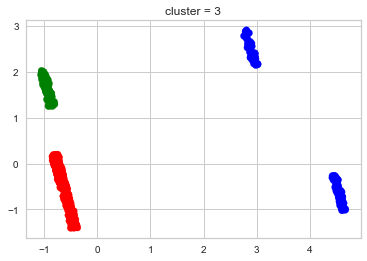

In [13]:
pca = PCA(n_components=2)
pca.fit(df)
z = pca.transform(df)

c = []
for label in labelsThree:
    if label == 0: c.append('red')
    elif label == 1: c.append('blue')
    elif label == 2: c.append('green')

plt.title("cluster = 3")
plt.scatter(z[:, 0], z[:, 1], c = c)
plt.show()

# Decision Boundaries

In [14]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans.fit(z)

KMeans(n_clusters=4, random_state=0)

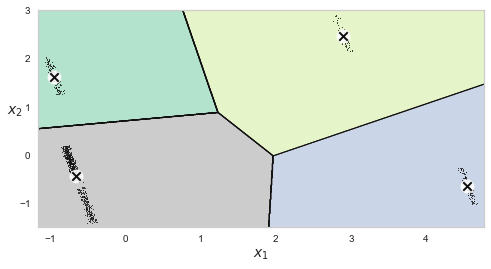

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, z)
plt.show()

# Not bad! Some of the instances near the edges were probably
# assigned to the wrong cluster, but overall it looks pretty good.

#  Silhouette Plot

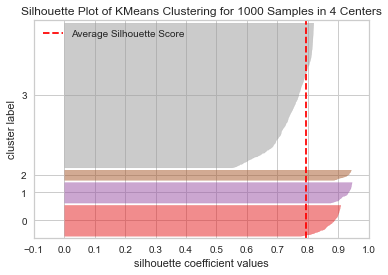

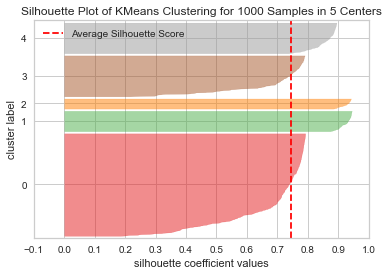

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in np.arange(4, 6):
  kmeans = KMeans(n_clusters=k, random_state=seed)
  visualizer = SilhouetteVisualizer(kmeans) # Get the clusterer model
  visualizer.fit(z) # Pass the data
  visualizer.show()
  plt.show()